In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.9/socket.py", line 293, in accept
    fd, addr = self._accept()
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.9/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise_exception("{0}() failed:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Data/dataFlight_version_2.csv", index_col=0)
df.head(3).append(df.tail(3))

Mounted at /content/drive


,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,2,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,-2.0,0.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0,671_AirTran Airways Corporation_2009-05-28
2013,2,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,14.0,14.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0,3297_Envoy Air - MQ_2013-06-29
2010,3,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,0.0,0.0,-20.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0,1806_Delta Airlines_2010-08-31
2003,4,11,14,5,US Airways Inc.,Charleston International Airport,"Charleston, SC",South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,-6.0,0.0,-11.0,0.0,0.0,0.0,1.0,168.0,1,0.0,0.0,0.0,0.0,0.0,Nov,0,1457_US Airways Inc._2003-11-14
2012,2,5,15,2,Southwest Airlines,Chicago Midway International Airport,"Chicago, IL",Illinois,Nashville International Airport,"Nashville, TN",Tennessee,8.0,8.0,-3.0,0.0,0.0,0.0,1.0,395.0,2,0.0,0.0,0.0,0.0,0.0,May,0,536_Southwest Airlines_2012-05-15
2003,2,4,29,2,United Airlines - UA,Washington Dulles International Airport,"Washington, DC",Virginia,Chicago O'Hare International Airport,"Chicago, IL",Illinois,-5.0,0.0,-14.0,0.0,0.0,0.0,1.0,589.0,3,0.0,0.0,0.0,0.0,0.0,Apr,0,1241_United Airlines - UA_2003-04-29


In [4]:
df = df.reset_index() 
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'DepDelay', 'DepDelayMinutes',
       'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted', 'Flights',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS',
       'Unique_Flight_ID'],
      dtype='object')

Je réange les colonnes selon mes préférences.

In [5]:
df = df[['Year', 'Quarter', 'Month', 'MONTH_AB', 'DayofMonth', 'DayOfWeek',
       'Unique_Flight_ID', 'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'DepDelay', 'DepDelayMinutes',
       'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted', 'Flights',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'FLIGHT_STATUS']]
df.head(2)

,Year,Quarter,Month,MONTH_AB,DayofMonth,DayOfWeek,Unique_Flight_ID,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FLIGHT_STATUS
0,2009,2,5,May,28,4,671_AirTran Airways Corporation_2009-05-28,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,-2.0,0.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,0
1,2013,2,6,Jun,29,6,3297_Envoy Air - MQ_2013-06-29,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,14.0,14.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,0


# Visualisations 

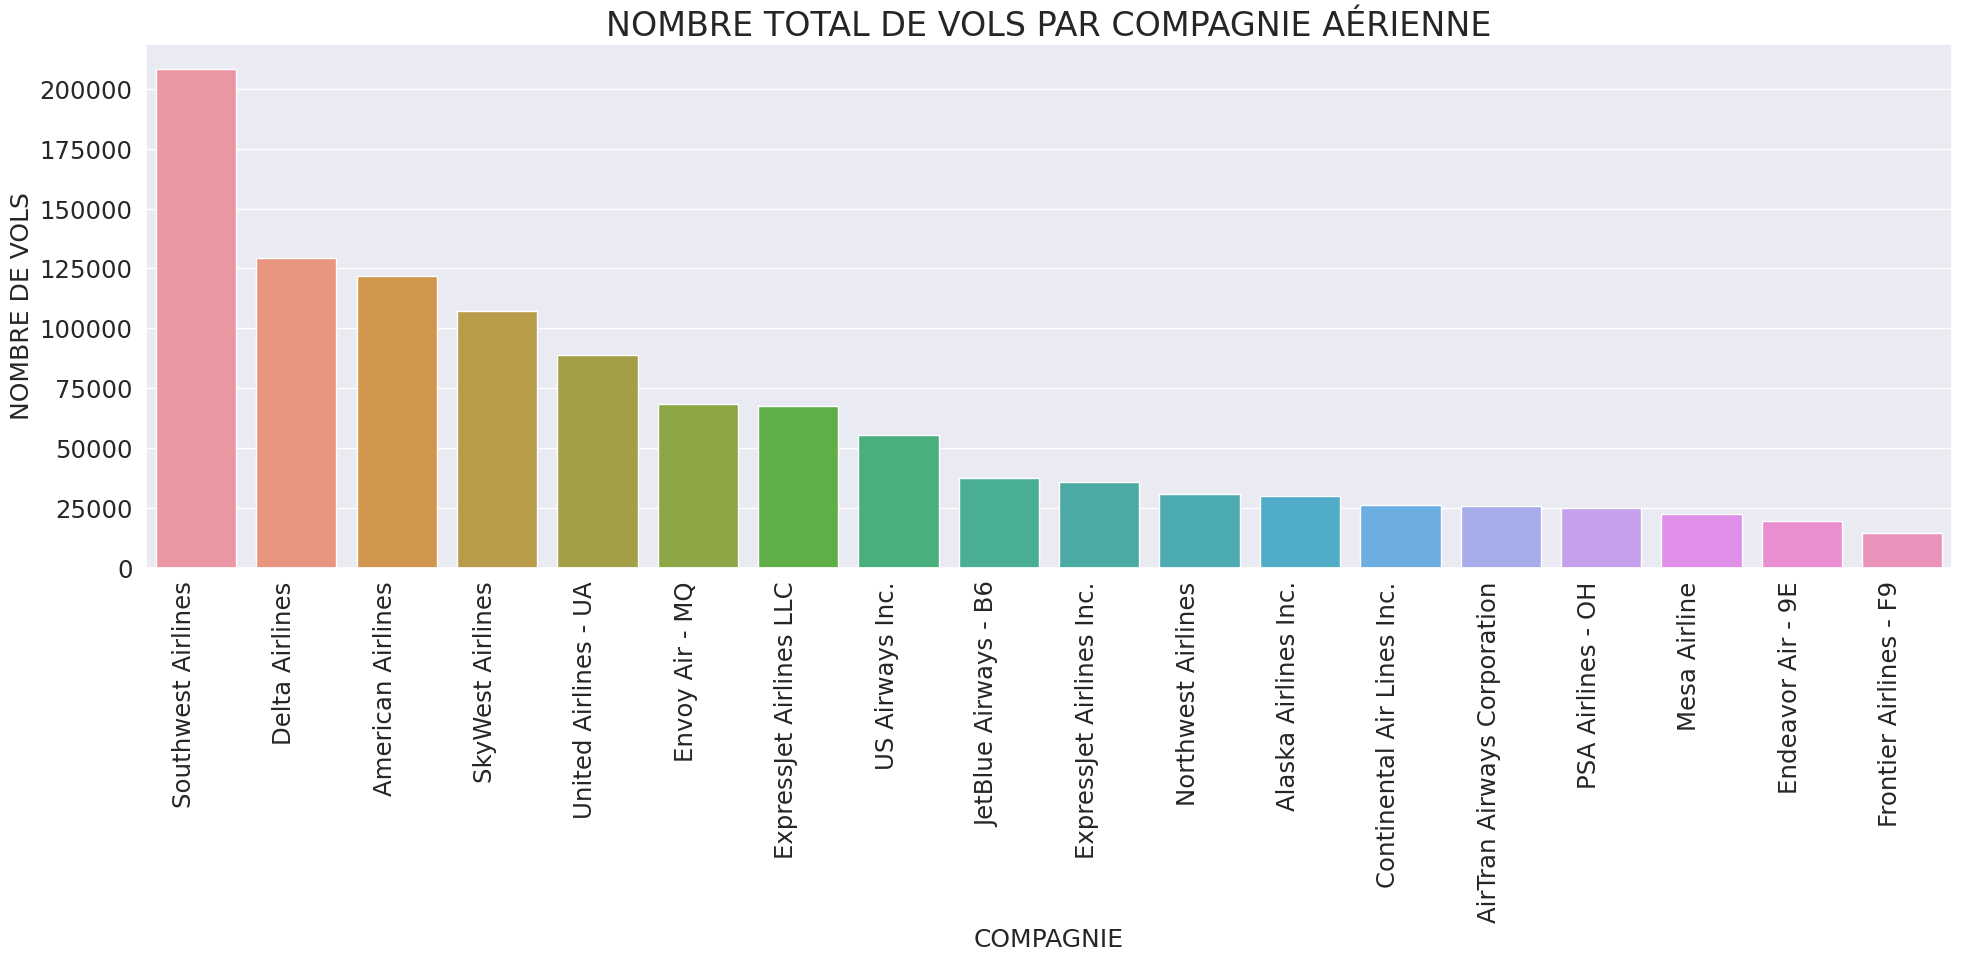

In [6]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['Reporting_Airline'], data=df, order=df['Reporting_Airline'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('NOMBRE TOTAL DE VOLS PAR COMPAGNIE AÉRIENNE', fontsize=24)
plt.xlabel('COMPAGNIE', fontsize=18)
plt.ylabel('NOMBRE DE VOLS', fontsize=18)
plt.tight_layout()
plt.show()

In [7]:
df.Reporting_Airline.value_counts()

Southwest Airlines             208361
Delta Airlines                 129347
American Airlines              121822
SkyWest Airlines               107153
United Airlines - UA            88681
Envoy Air - MQ                  68529
ExpressJet Airlines LLC         67600
US Airways Inc.                 55325
JetBlue Airways - B6            37638
ExpressJet Airlines Inc.        35645
Northwest Airlines              30819
Alaska Airlines Inc.            30136
Continental Air Lines Inc.      26078
AirTran Airways Corporation     25954
PSA Airlines - OH               24786
Mesa Airline                    22555
Endeavor Air - 9E               19666
Frontier Airlines - F9          14320
Hawaiian Airlines - HA          11683
Spirit Airlines - NK             8647
Republic Airways                 7569
Independence Air                 7165
America West Airlines Inc.       6011
Virgin America                   3994
Allegiant Air - G4               2306
ATA Airlines                     2163
Aloha Air Ca

C'est assez intéressante pour commencer car elle nous indique déjà quelles sont les compagnies aériennes avec le plus de vols intérieurs aux États-Unis :<br>

<b>1. Southwest Airline</b><br>
<b>2. Delta Airlines</b><br>
<b>3. American Airlines</b><br>
<b>4. SkyWest Airlines</b><br>
<b>5. United Airlines</b><br>

Maintenant la question à se poser serait : si les 5 premières compagnies aériennes en nombre de vols, sont aussi les meilleures en termes d'arrivée à l'heure ? Voyons quelles sont les compagnies aériennes avec le vol le plus retardé pour tenter de répondre à cela :

## Nombre de vols retardés par compagnie aérienne

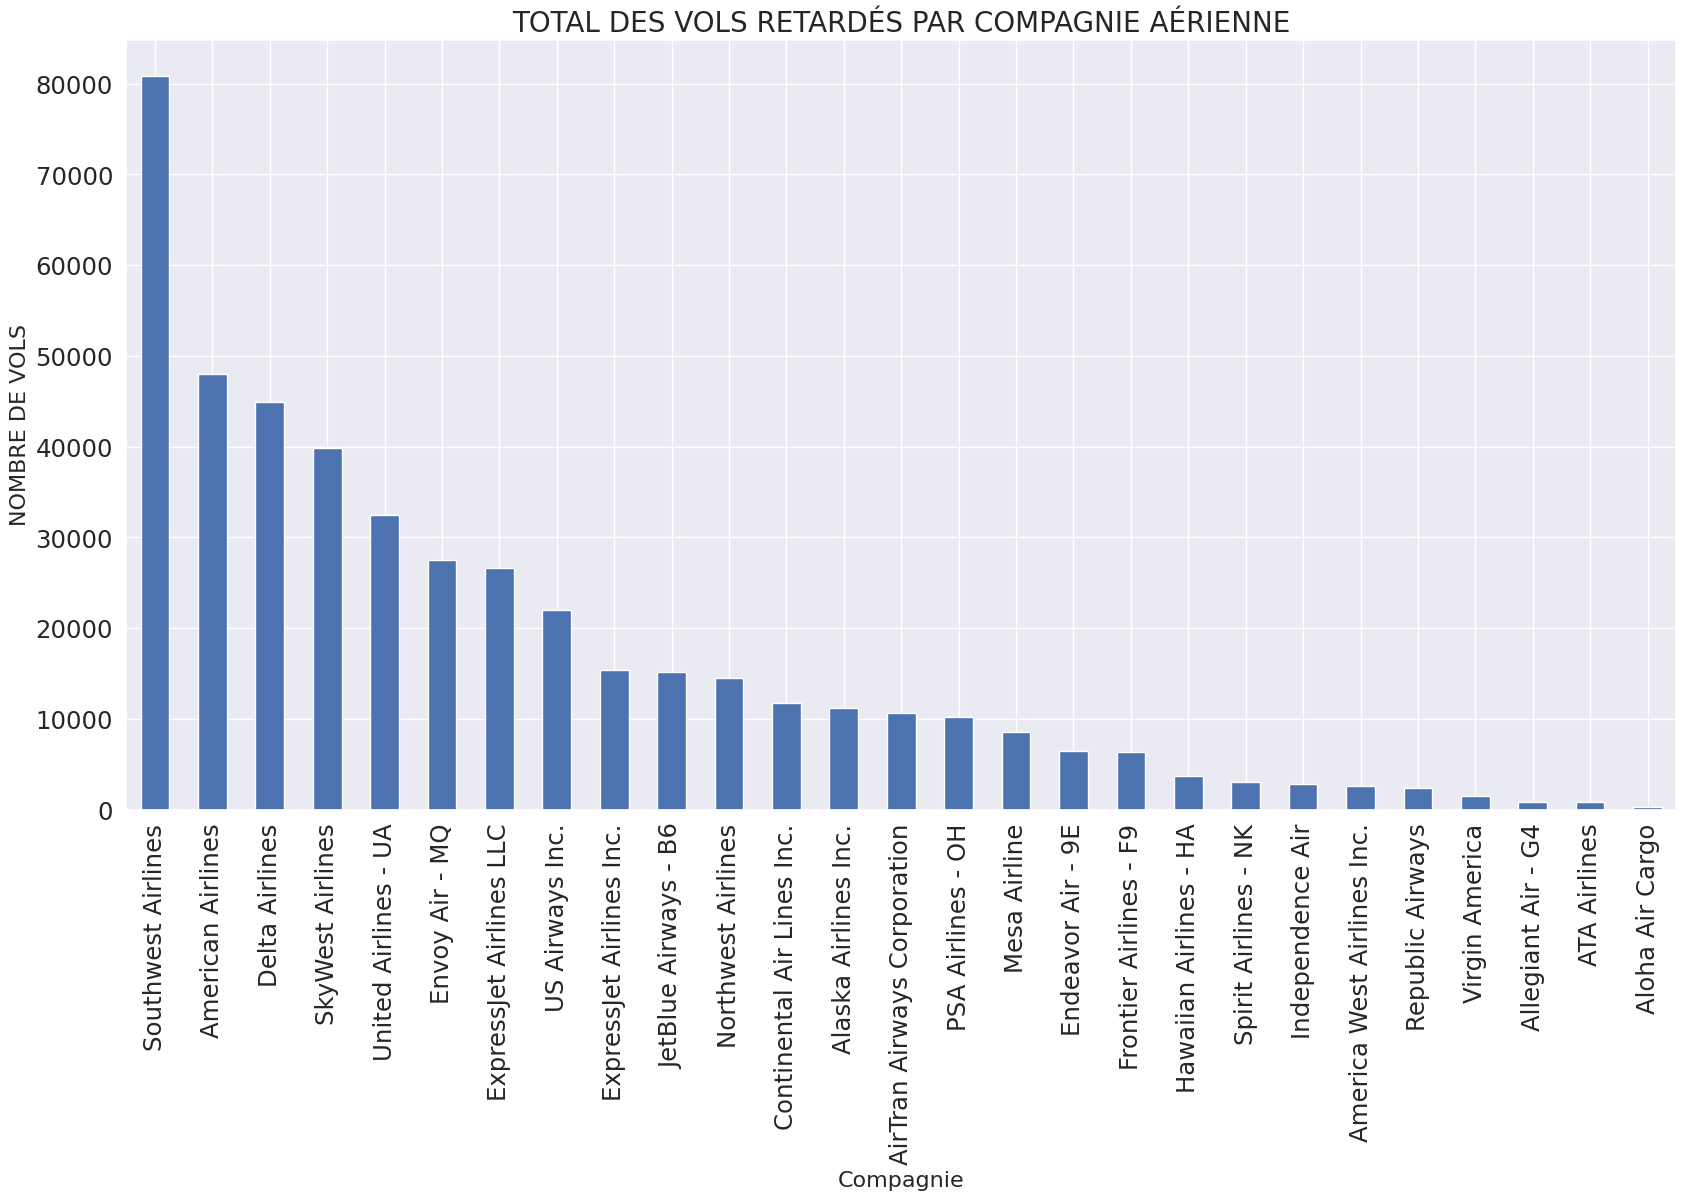

In [8]:
plt.figure(figsize=(20, 10))
df.groupby('Reporting_Airline').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DES VOLS RETARDÉS PAR COMPAGNIE AÉRIENNE', fontsize=20)
plt.xlabel('Compagnie', fontsize=16)
plt.ylabel('NOMBRE DE VOLS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

De ce graphique, nous pouvons maintenant extraire les 5 premières compagnies aériennes avec les vols les plus retardés, qui sont :<br>

<b>1. Southwest Airlines</b><br>
<b>2. American Airlines</b><br>
<b>3. Delta Airlines</b><br>
<b>4. SkyWest Airlines</b><br>
<b>5. United Airlines</b><br>

Une compagnie aérienne qui se démarque du lot est ExpressJet Airlines Inc., ils ont le septième plus grand nombre de vols, et ils sont classés numéro 9 sur 18 en termes de vols retardés. Je n'ai toujours pas calculé le <b>pourcentage de vols retardés</b> et <b>le temps de retard moyen par compagnie aérienne</b>, alors allons-y, car cela pourrait être une meilleure représentation de la façon dont les compagnies aériennes effectuer.

## Pourcentage de vols retardés par compagnie aérienne

In [9]:
df.FLIGHT_STATUS.value_counts(normalize=True)

0    0.613128
1    0.386872
Name: FLIGHT_STATUS, dtype: float64

In [66]:
df1_PFD = df[['Reporting_Airline', 'FLIGHT_STATUS']]

In [67]:
test_1 = df1_PFD.groupby(['Reporting_Airline']).sum().reset_index()

test_2 = df.Reporting_Airline.value_counts().rename_axis('Reporting_Airline').reset_index(name='TOTAL_FLIGHTS')

df_fp = pd.merge(test_1, test_2, on='Reporting_Airline')

df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

df_fp.head(20)

,Reporting_Airline,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,ATA Airlines,872,2163,40.31
1,AirTran Airways Corporation,10619,25954,40.91
2,Alaska Airlines Inc.,11173,30136,37.08
3,Allegiant Air - G4,887,2306,38.46
4,Aloha Air Cargo,278,888,31.31
5,America West Airlines Inc.,2647,6011,44.04
6,American Airlines,47999,121822,39.40
7,Continental Air Lines Inc.,11708,26078,44.90
8,Delta Airlines,44955,129347,34.76
9,Endeavor Air - 9E,6447,19666,32.78


<Figure size 2000x1000 with 0 Axes>

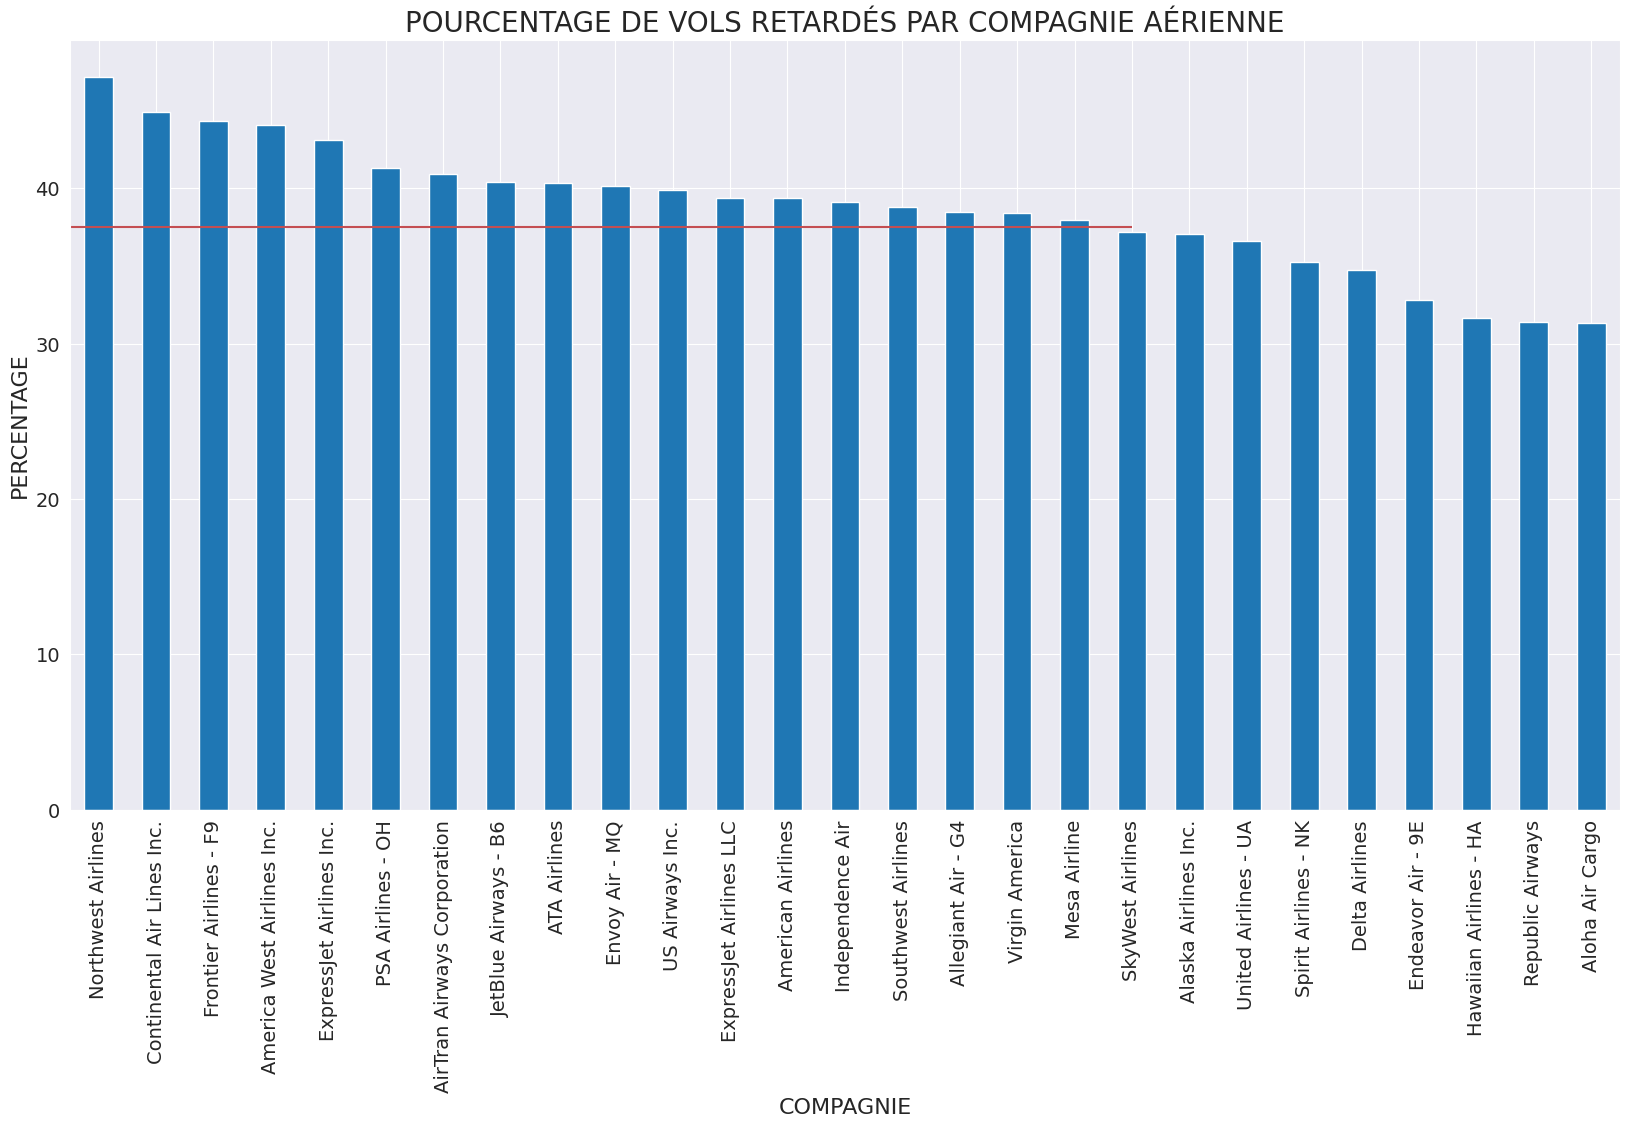

In [73]:
plt.figure(figsize=(20, 10))
df_fp.groupby('Reporting_Airline').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('POURCENTAGE DE VOLS RETARDÉS PAR COMPAGNIE AÉRIENNE', fontsize=20)
plt.xlabel('COMPAGNIE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

Nous pouvons tirer plusieurs observations intéressantes :

1. Delta Airlines a le deuxième plus grand nombre de vols, mais se classe quatrième en termes de nombre de vols retardés. Cependant, avec un pourcentage de vols retardés de 29,50%, elle est la compagnie aérienne avec le meilleur pourcentage, situé 8% en dessous du seuil.

2. Bien que Southwest Airlines ait également un grand nombre de vols, elle est la cinquième compagnie aérienne ayant le plus grand nombre de vols retardés. Toutefois, comparée à Delta Airlines, elle est légèrement pire et se situe toujours à plus de 3% au-dessus du seuil.

3. SkyWest et United Airlines se classent respectivement quatrième et cinquième en termes de nombre de vols, mais troisième et cinquième en termes de nombre de vols retardés. Cependant, leur pourcentage de vols retardés est en dessous du seuil, ce qui est encourageant.

Dans la suite de cette analyse, nous choisirons certaines de ces données pour les regrouper et faciliter les comparaisons.

## Nombre total de minutes de retard par compagnie aérienne

<Figure size 2000x1000 with 0 Axes>

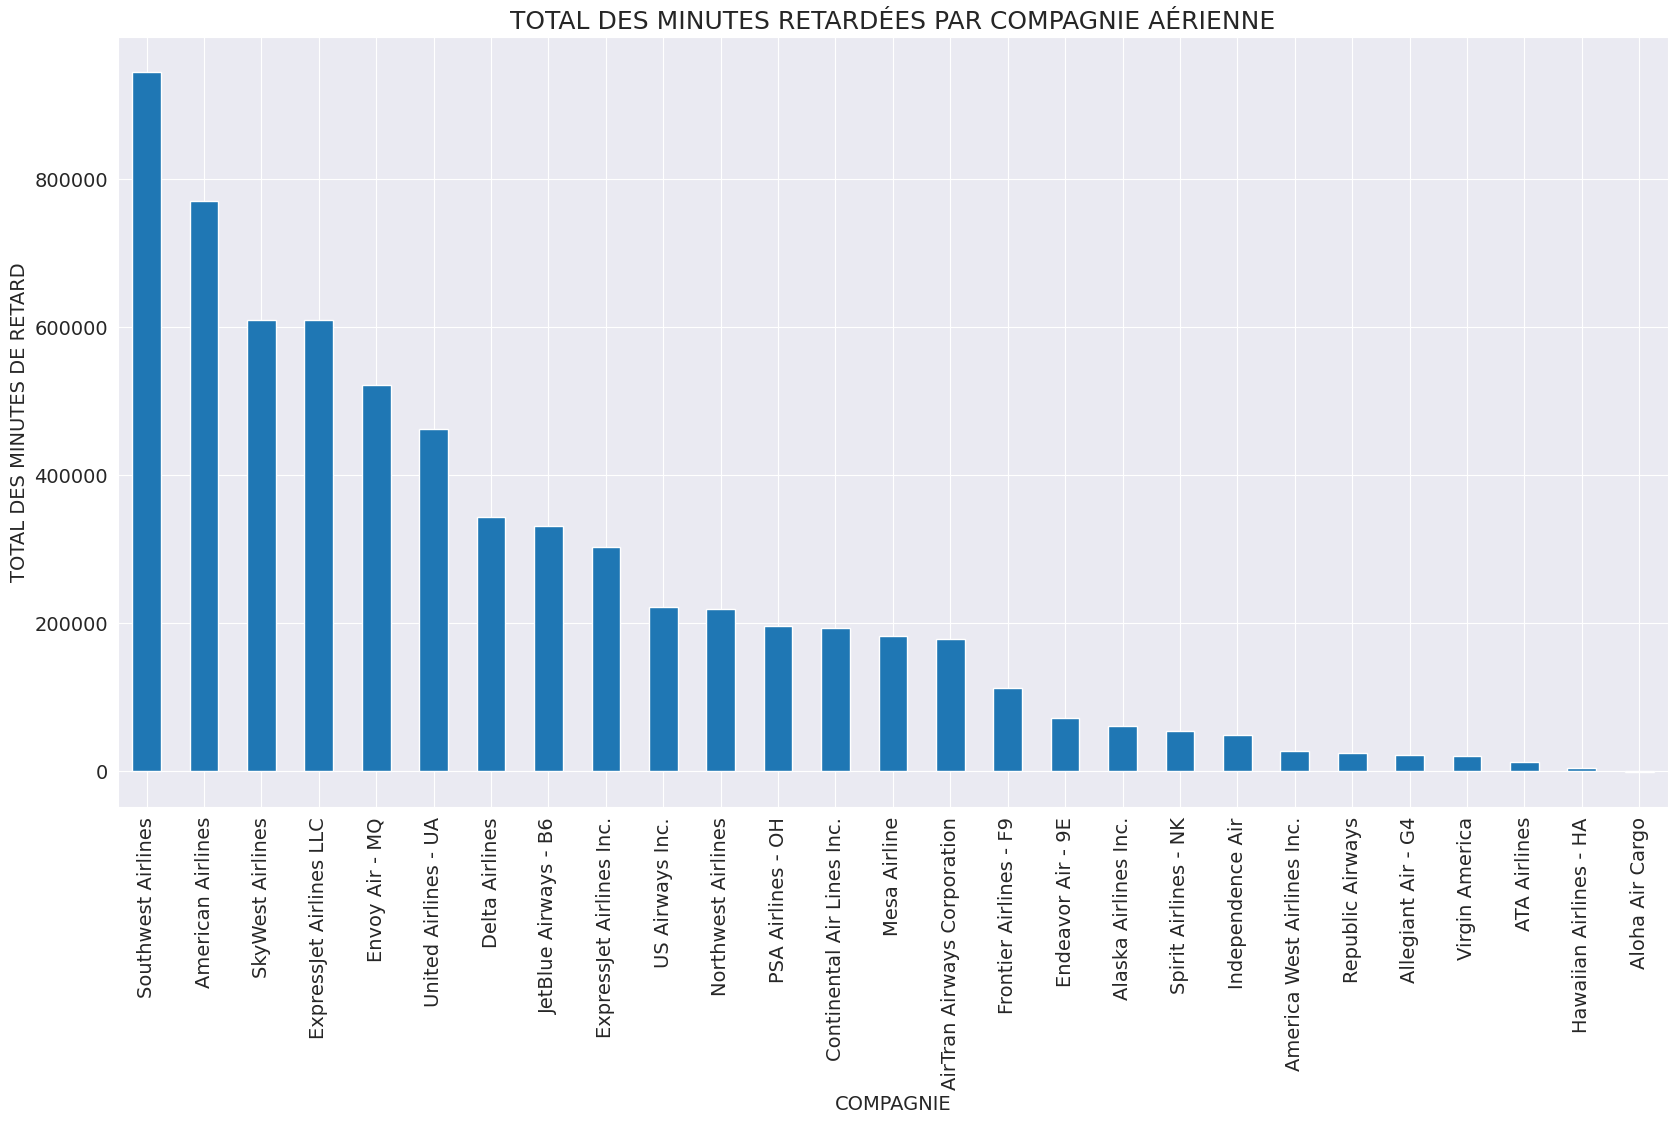

In [76]:
plt.figure(figsize=(20, 10))
df.groupby('Reporting_Airline').ArrDelay.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DES MINUTES RETARDÉES PAR COMPAGNIE AÉRIENNE', fontsize=18)
plt.xlabel('COMPAGNIE', fontsize=14)
plt.ylabel('TOTAL DES MINUTES DE RETARD', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()


## Retard moyen par compagnie aérienne

Je prévois de classer le retard moyen des vols d'arrivée en ordre croissant, afin de voir les compagnies aériennes ayant les valeurs les plus basses en premier. Étant donné que le retard moyen est une statistique négative, cela permettra de mettre en évidence les meilleures compagnies aériennes.

In [10]:
test_3 = df[['Reporting_Airline', 'ArrDelay']]
test_3 = test_3.groupby(['Reporting_Airline']).mean().reset_index()
test_3.rename({'ArrDelay': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,Reporting_Airline,AVG_DELAY
0,Aloha Air Cargo,-0.620296
1,Hawaiian Airlines - HA,0.420505
2,Alaska Airlines Inc.,2.041825
3,Delta Airlines,2.693091
4,Republic Airways,3.404392
5,Endeavor Air - 9E,3.755849
6,US Airways Inc.,4.070472
7,Southwest Airlines,4.597930
8,America West Airlines Inc.,4.647376
9,United Airlines - UA,5.302743


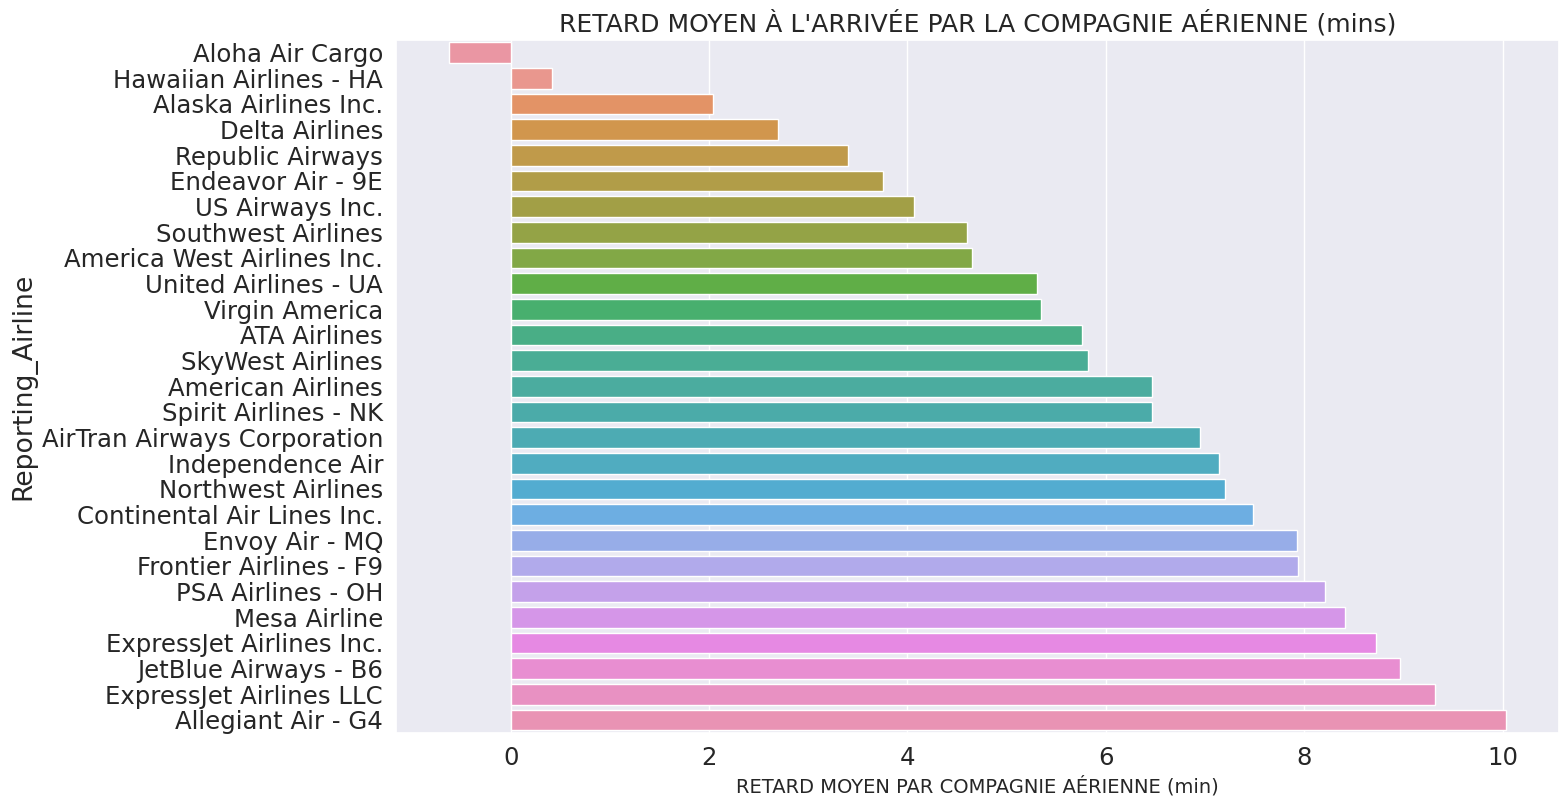

In [11]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='Reporting_Airline', data=test_3)
ax.set_title("RETARD MOYEN À L'ARRIVÉE PAR LA COMPAGNIE AÉRIENNE (mins)", fontsize=18)
ax.set_xlabel("RETARD MOYEN PAR COMPAGNIE AÉRIENNE (min)", fontsize=14)
plt.show()

Delta Airlines ne des principales compagnies aériennes. Bien qu'elle se classe parmi les cinq premières compagnies aériennes en termes de nombre de vols et de retards, Delta Airlines maintient les meilleurs taux de retards en pourcentage ainsi que le nombre total de minutes retardées. Ce qui suggère que, malgré les retards, ils sont minimes en moyenne.

## 20 destinations les plus courantes (villes)

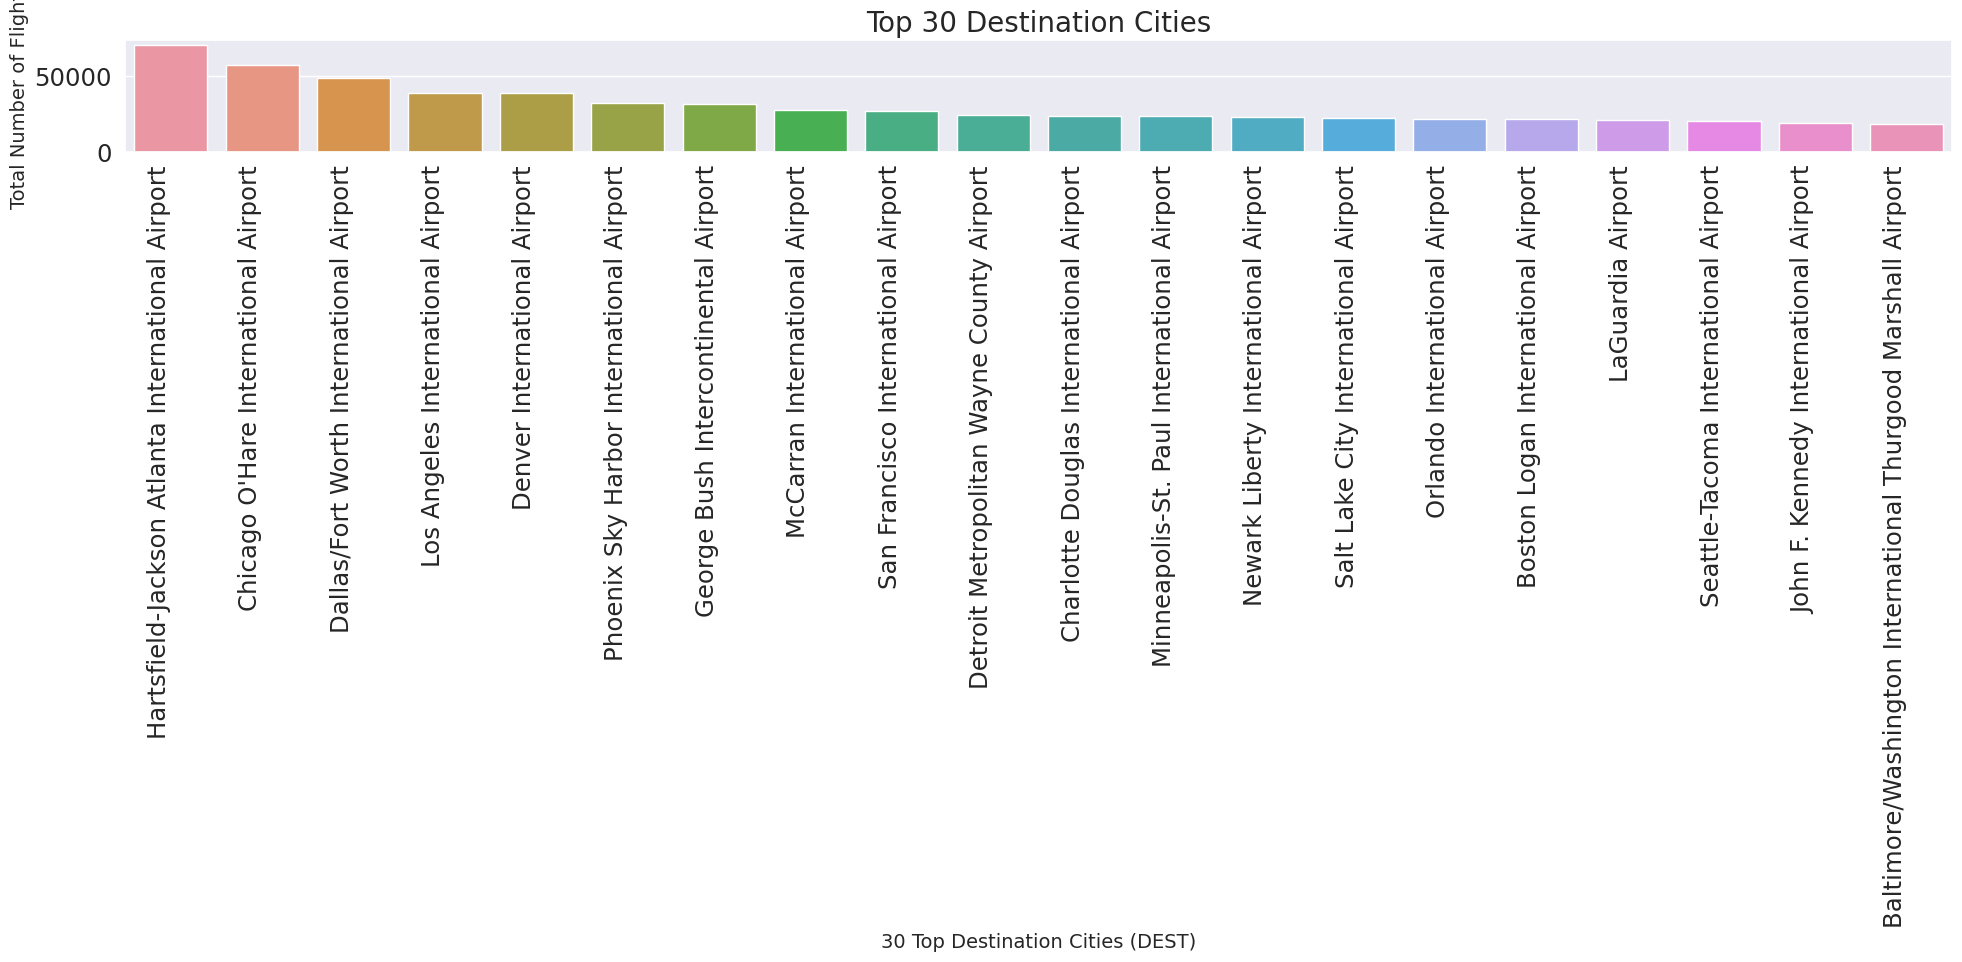

In [12]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['Dest'], data=df, order=df['Dest'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 20 des villes de destination', fontsize=20)
plt.xlabel('20 meilleures villes de destination (DEST)', fontsize=14)
plt.ylabel('Nombre total de vols', fontsize=14)
plt.tight_layout()
plt.show()

## Les pires et les meilleurs mois pour voyager en fonction des retards de vol

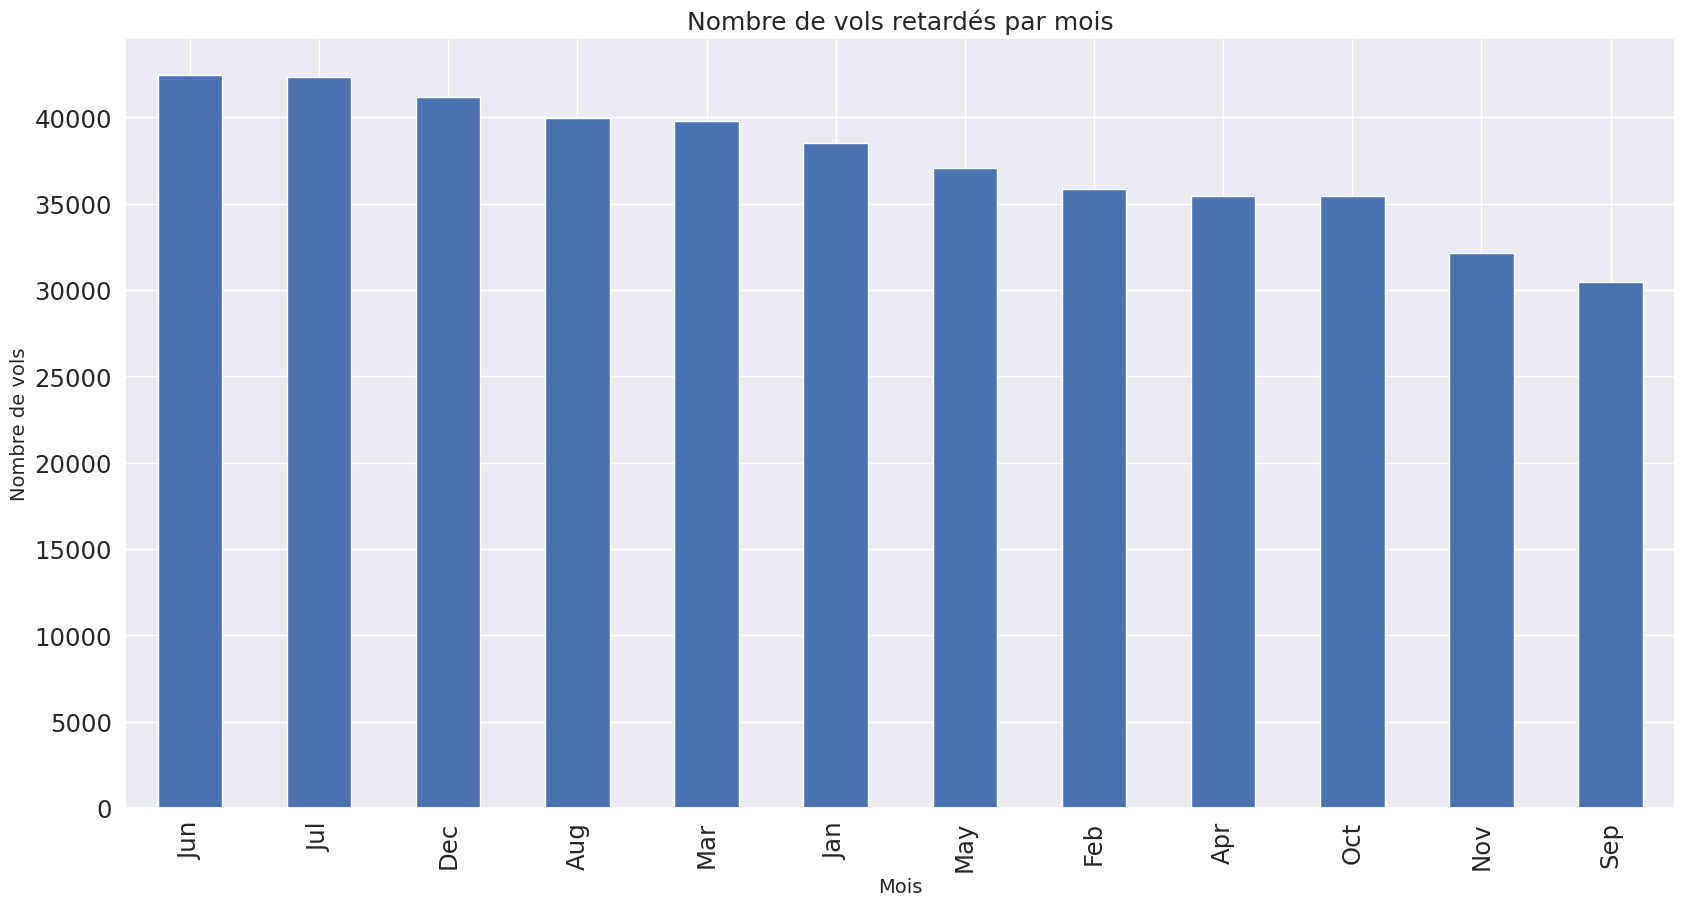

In [14]:
plt.figure(figsize=(20, 10))
df.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Nombre de vols retardés par mois', fontsize=18)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Nombre de vols', fontsize=14)
plt.show()

D'après ces données, les mois les plus propices aux retards de vol sont principalement ceux de l'été, à savoir juillet, août et juin. Viennent ensuite les mois de fin d'année, à savoir décembre et janvier, qui incluent la période de Noël. En revanche, les mois les plus favorables pour voyager sont février, avril et septembre, car ils se situent clairement en dehors des périodes de vacances standards (été et Noël).

## Existe-t-il un meilleur jour pour voyager ?

In [16]:
df.columns

Index(['Year', 'Quarter', 'Month', 'MONTH_AB', 'DayofMonth', 'DayOfWeek',
       'Unique_Flight_ID', 'Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginStateName', 'Dest', 'DestCityName', 'DestStateName', 'DepDelay',
       'DepDelayMinutes', 'ArrDelay', 'ArrDelayMinutes', 'Cancelled',
       'Diverted', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'FLIGHT_STATUS'],
      dtype='object')

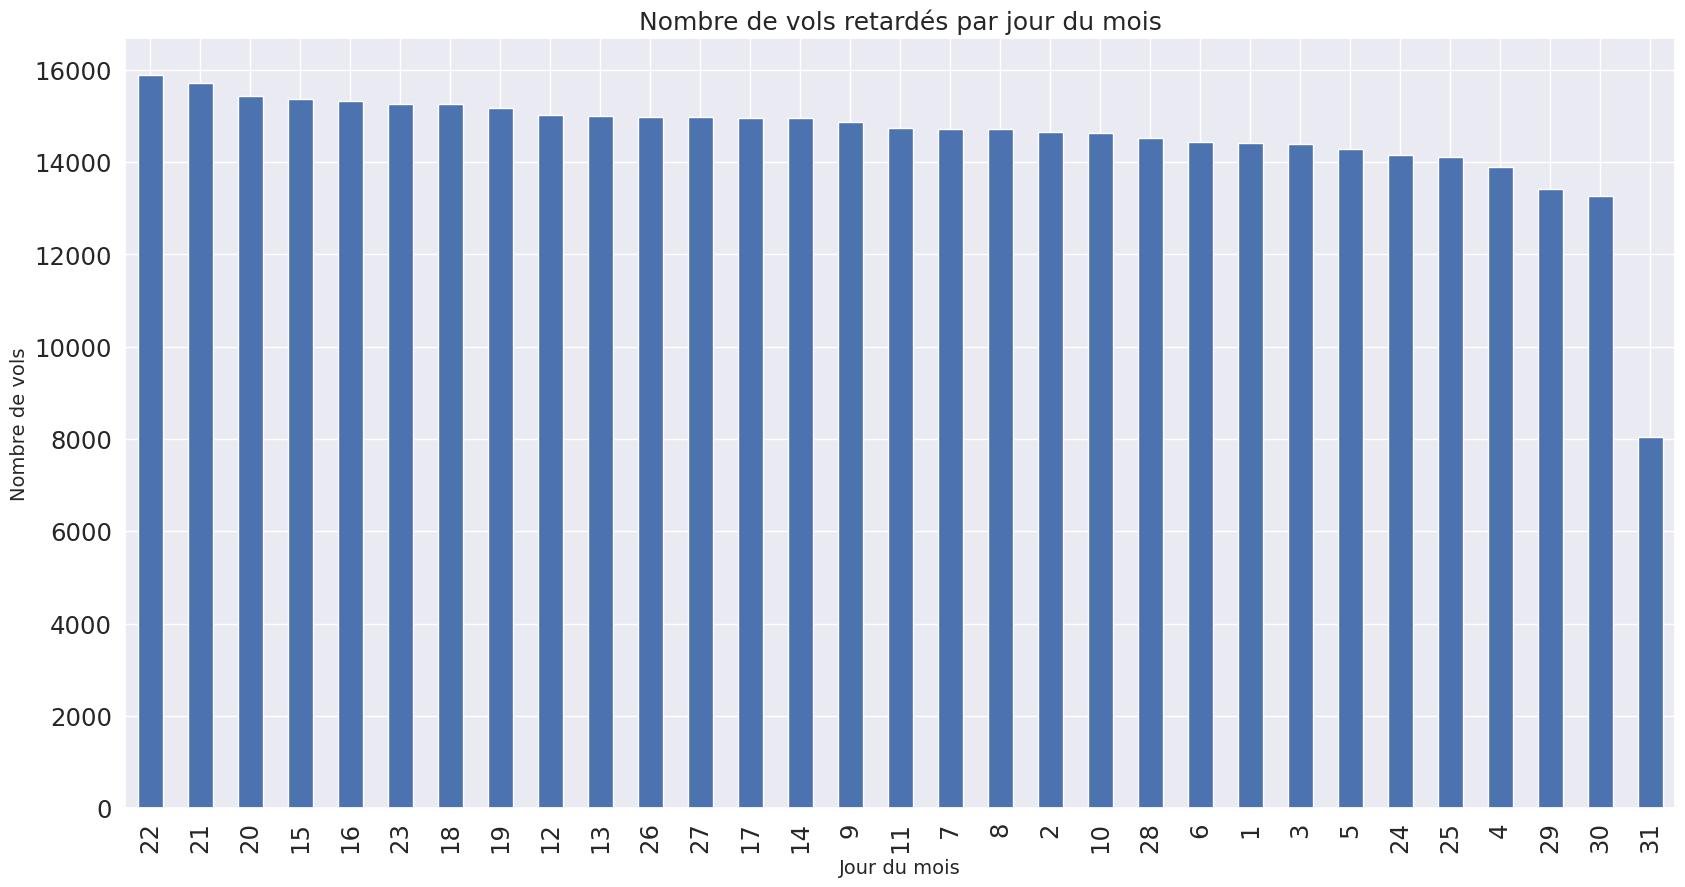

In [18]:
plt.figure(figsize=(20, 10))
df.groupby('DayofMonth').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Nombre de vols retardés par jour du mois', fontsize=18)
plt.xlabel('Jour du mois', fontsize=14)
plt.ylabel('Nombre de vols', fontsize=14)
plt.show()

Il est difficile d'affirmer quelque chose de manière catégorique. Tout ce que nous pouvons constater, c'est que les 29, 30 et 31 semblent être des journées où il y a moins de vols retardés. Cependant, je ne suis pas convaincu que cette observation soit suffisamment solide pour en tirer une conclusion.

## Impact des retards (retard au départ ou à l'arrivée)

Je souhaite déterminer le facteur qui a le plus d'impact sur les retards de vol en général. Si un vol est à l'heure au départ mais en retard à l'arrivée, cela indique qu'il y a eu un autre facteur qui a prolongé le temps nécessaire pour le voyage en avion prévu. Ce graphique pourrait également vérifier l'hypothèse selon laquelle certaines compagnies aériennes réduisent leur temps de vol pour compenser les retards au départ. Cependant, cette hypothèse n'est actuellement qu'une théorie qui reste à confirmer.

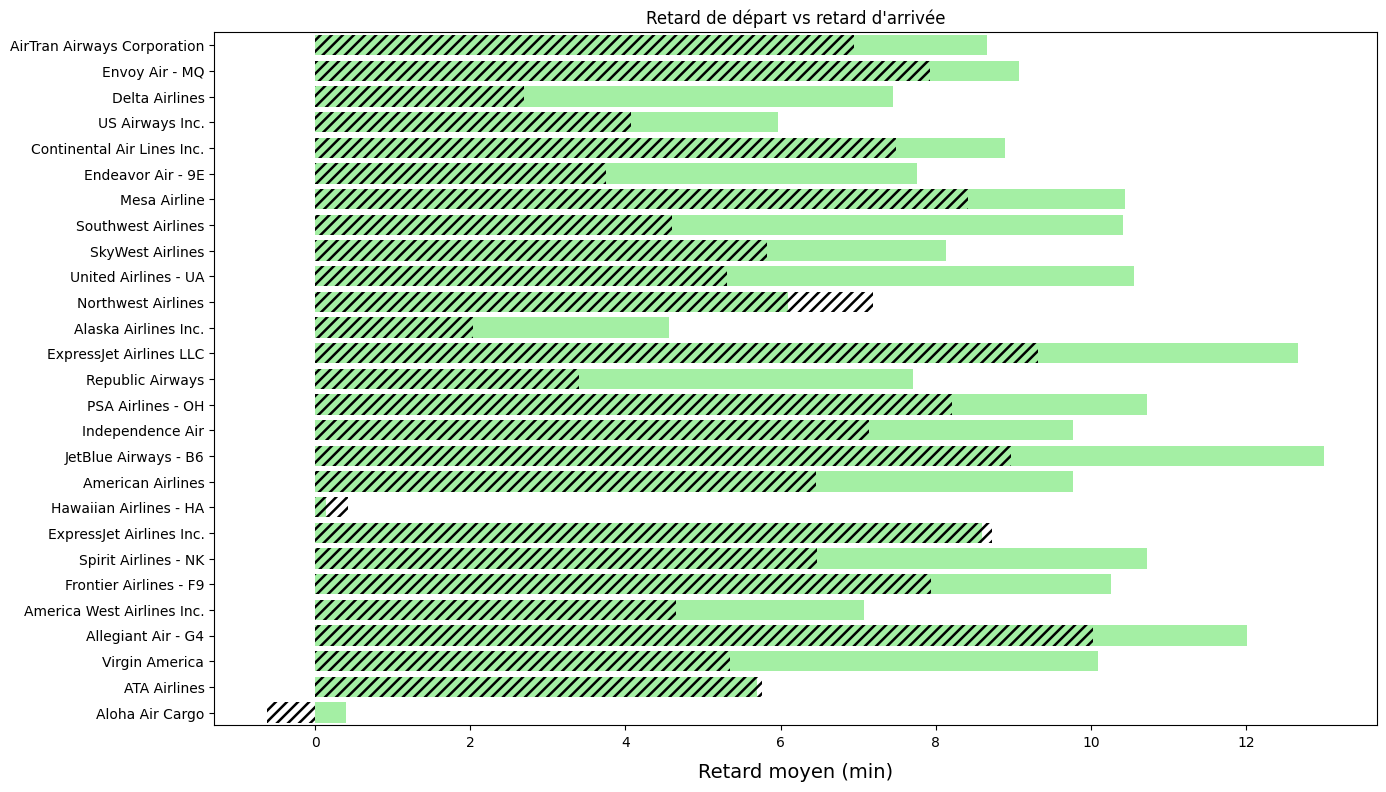

In [28]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DepDelay", y="Reporting_Airline", data=df, color="palegreen", ci=None)
ax = sns.barplot(x="ArrDelay", y="Reporting_Airline", data=df, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title("Retard de départ vs retard d'arrivée")
plt.xlabel('Retard moyen (min)', fontsize=14, labelpad=10);
plt.show()

Le code couleur bleu clair est attribué au retard au départ (**DepDelay**), tandis 
que la ligne pointillée représente le retard à l'arrivée (**ArrDelay**). 

Les résultats du graphique sont intéressants, car ils indiquent que les retards à l'arrivée sont généralement moins importants que les retards au départ. Cette observation suggère que les compagnies aériennes cherchent à adapter leur vitesse de vol pour réduire les **ArrDelay**, en dépit d'un départ tardif.

## Quelle est la destination la plus populaire ayant en moyenne les retards d'arrivée les plus élevés ?

In [46]:
test_4 = df[['Dest', 'ArrDelay']]
test_4 = test_4.groupby(['Dest']).mean().reset_index()


test_5 = df.Dest.value_counts().rename_axis('Dest').reset_index(name='FLIGHTS').iloc[0:30]

test_4_5 = pd.merge(test_5, test_4, on='Dest')

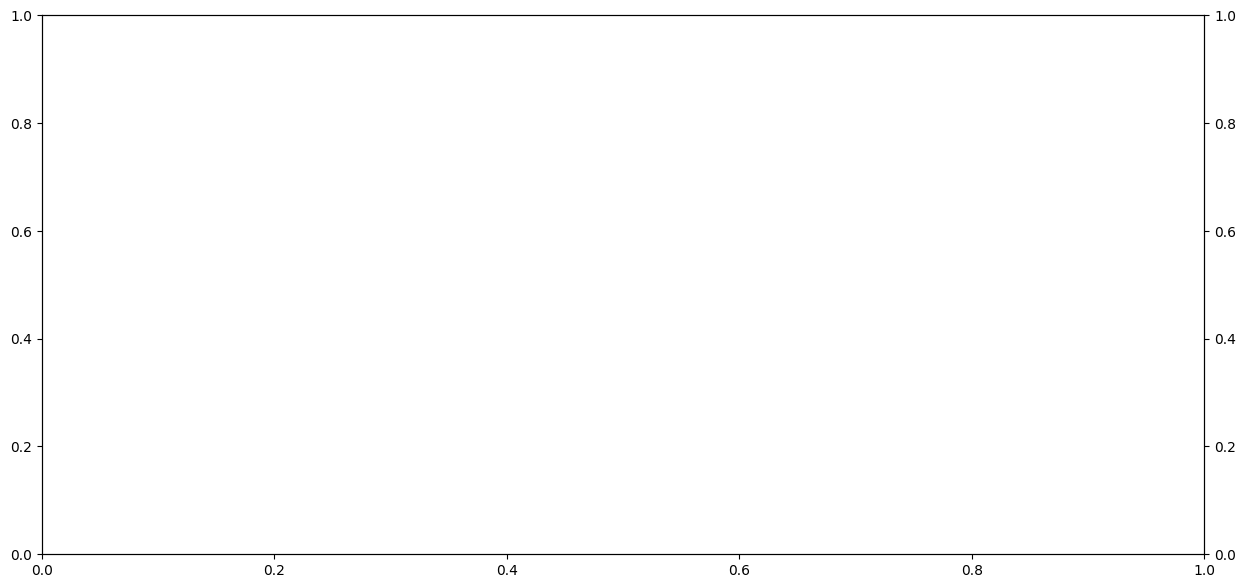

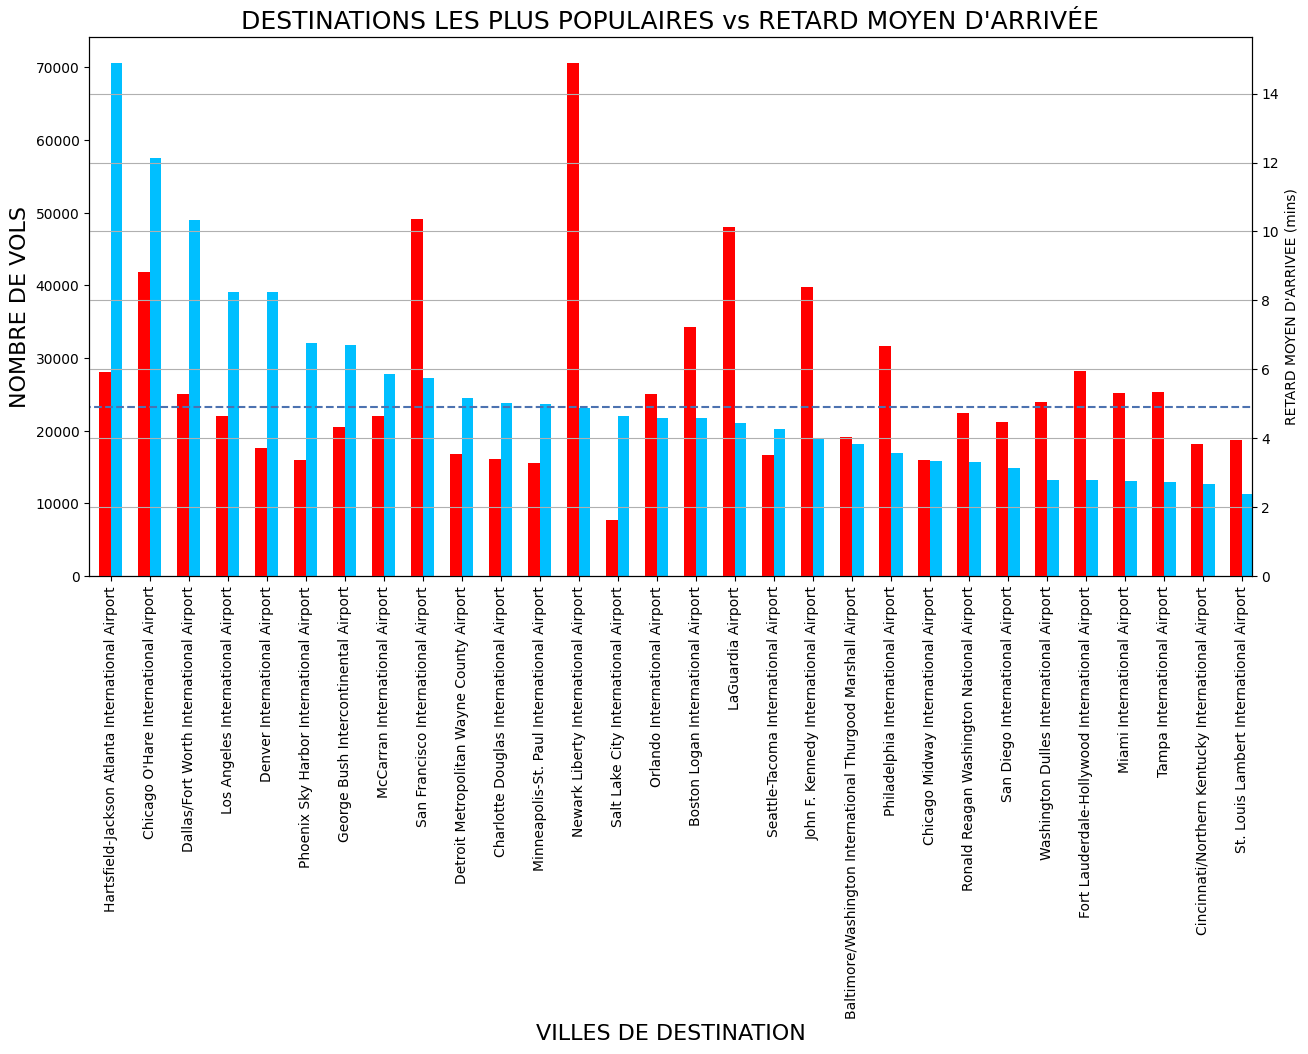

In [47]:
test_4_5 = test_4_5.set_index('Dest')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='deepskyblue',ax=ax, width=width, position=0)
test_4_5.ArrDelay.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title("DESTINATIONS LES PLUS POPULAIRES vs RETARD MOYEN D'ARRIVÉE", fontsize=18)
ax.set_ylabel('NOMBRE DE VOLS', fontsize=16)
ax2.set_ylabel("RETARD MOYEN D'ARRIVEE (mins)")
ax.set_xlabel('VILLES DE DESTINATION', fontsize=16)

plt.show()

La ligne en pointillé du graphique indique le temps moyen de retard à l'arrivée pour les 30 premières destinations. 

Il est intéressant de constater que, malgré un nombre élevé d'atterrissages, **Atlanta présente un retard moyen très faible** d'un peu plus de 5 minutes, tandis que** Newark, qui est moins populaire, affiche un retard moyen élevé** en minutes. Par ailleurs, San Francisco, La Guardia et JFK sont également des destinations qui se distinguent avec des retards moyens élevés.

## Villes de départ avec les vols de départ les plus retardés

In [53]:
test_6 = df[['Origin', 'DepDelay']]
test_6 = test_6.groupby(['Origin']).mean().reset_index()

test_7 = df.Origin.value_counts().rename_axis('Origin').reset_index(name='FLIGHTS').iloc[0:30]

test_6_7 = pd.merge(test_7, test_6, on='Origin')

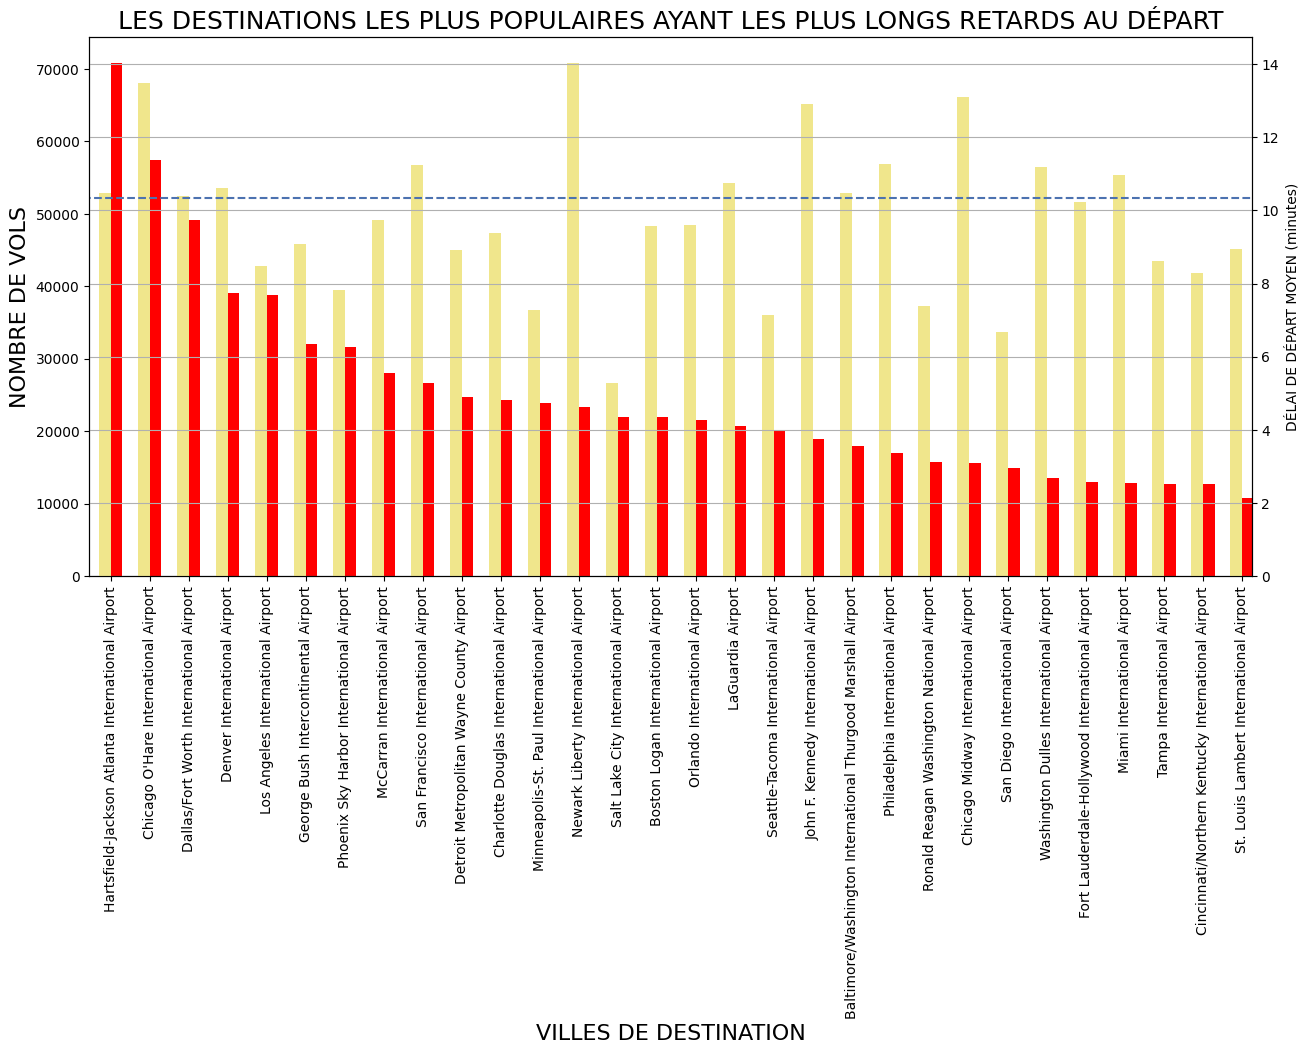

In [54]:
test_6_7 = test_6_7.set_index('Origin')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DepDelay.plot(kind='bar',color='khaki', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('LES DESTINATIONS LES PLUS POPULAIRES AYANT LES PLUS LONGS RETARDS AU DÉPART', fontsize=18)
ax.set_ylabel('NOMBRE DE VOLS', fontsize=16)
ax2.set_ylabel('DÉLAI DE DÉPART MOYEN (minutes)')
ax.set_xlabel('VILLES DE DESTINATION', fontsize=16)
plt.show()

Il s'agit probablement d'une intrigue très intéressante en raison des informations qu'elle révèle. Elle met en évidence l'importance des retards au départ sur l'arrivée à l'heure des vols.

## Nombre de destinations par compagnie aérienne

In [56]:
cities = df[['Reporting_Airline', 'Dest', 'ArrDelay']]
cities = cities.groupby(['Reporting_Airline', 'Dest']).mean().reset_index()

cities_airline = cities.Reporting_Airline.value_counts().rename_axis('Reporting_Airline').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,Reporting_Airline,NUMBER_CITIES
0,SkyWest Airlines,310
1,ExpressJet Airlines LLC,233
2,Envoy Air - MQ,205
3,Mesa Airline,178
4,Endeavor Air - 9E,175
5,Delta Airlines,167
6,ExpressJet Airlines Inc.,165
7,PSA Airlines - OH,146
8,Northwest Airlines,126
9,Frontier Airlines - F9,126


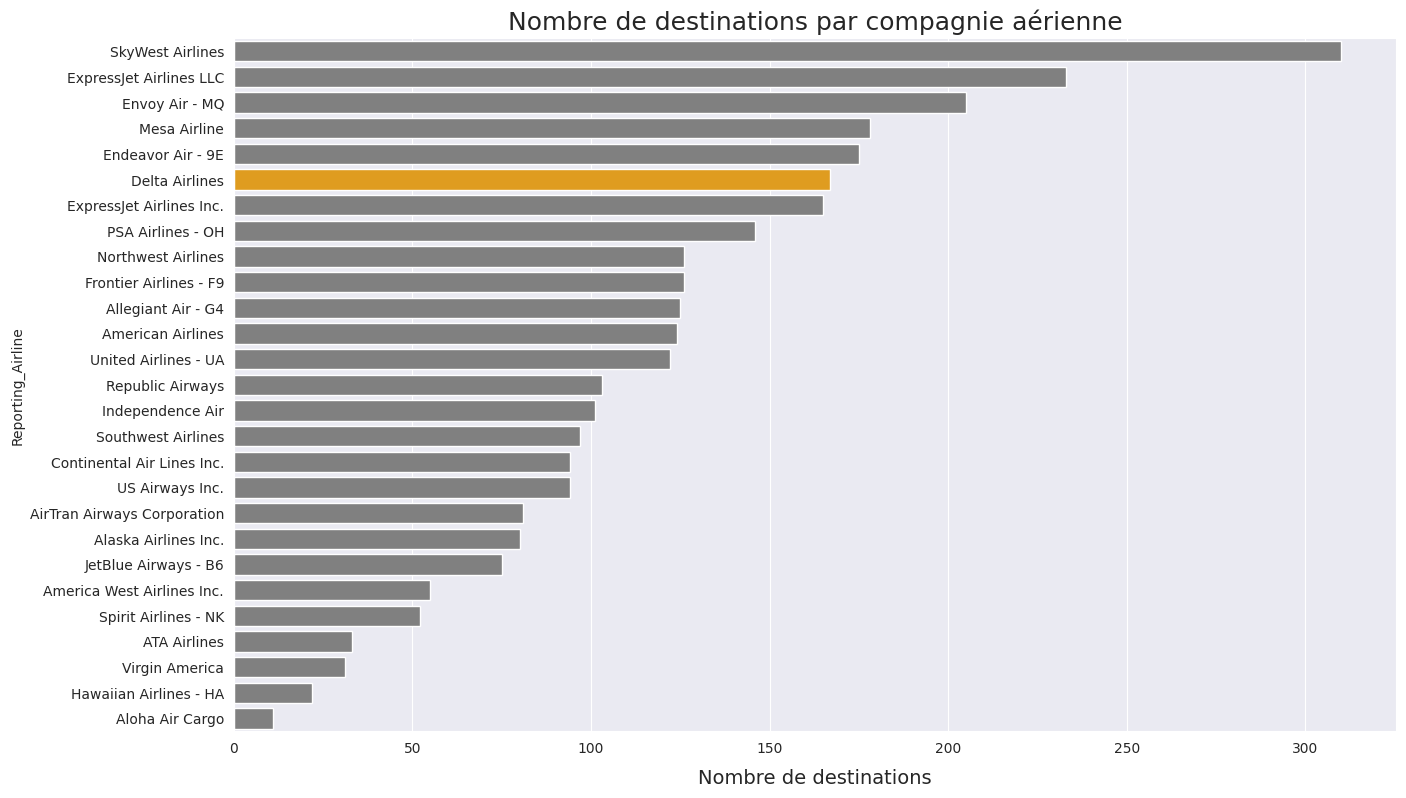

In [58]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="Reporting_Airline", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.Reporting_Airline])
plt.title('Nombre de destinations par compagnie aérienne', fontsize=18)
plt.xlabel('Nombre de destinations', fontsize=14, labelpad=10);
plt.show()

Une fois de plus, Delta Airlines se trouve dans une position favorable. 

In [61]:
df['ARR-DEP_DELAY'] = df['ArrDelay'] - df['DepDelay']

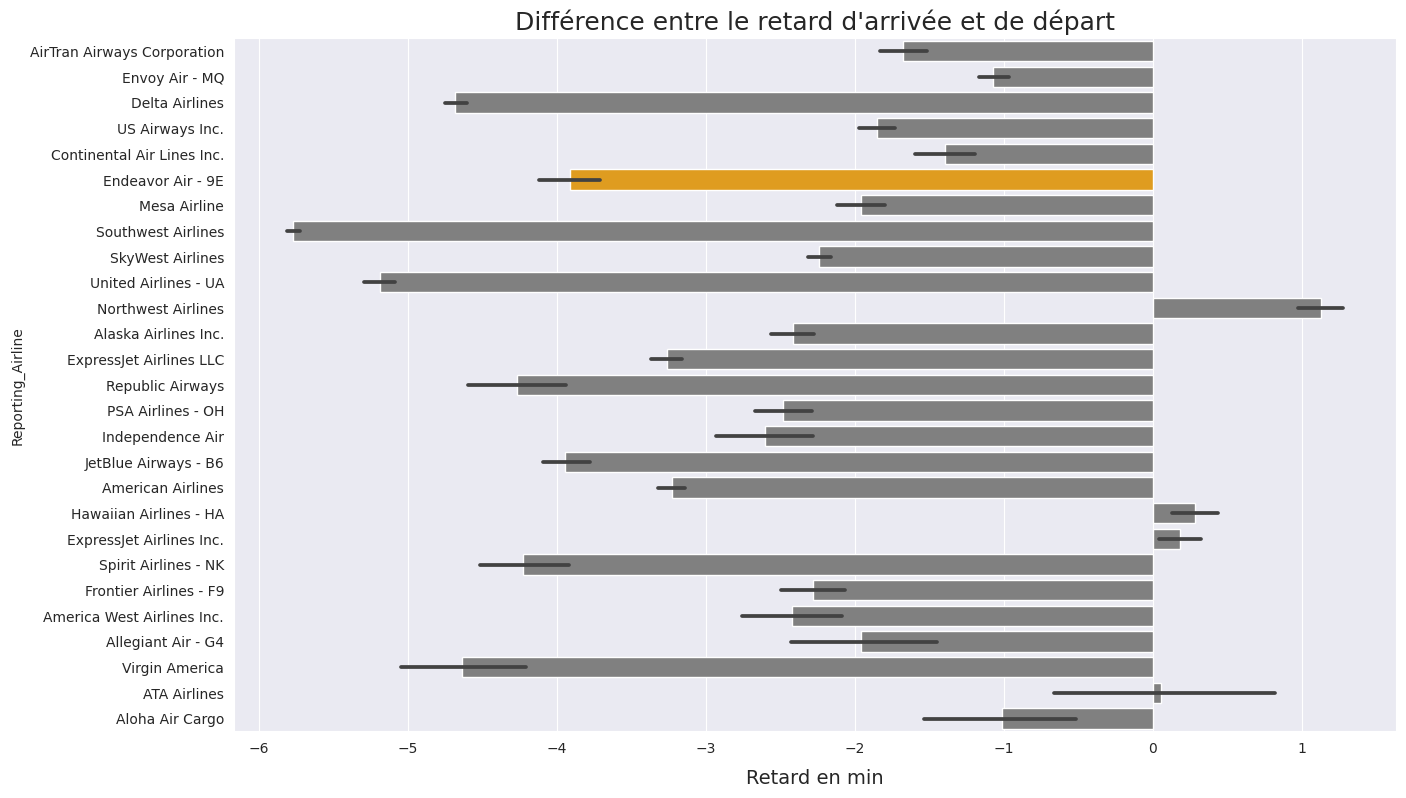

In [63]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="Reporting_Airline", data=df, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.Reporting_Airline])
plt.title("Différence entre le retard d'arrivée et de départ", fontsize=18)
plt.xlabel('Retard en min', fontsize=14, labelpad=10);
plt.show()

# Visualisations

L'objectif est de permettre la comparaison de toutes les compagnies aériennes en utilisant plusieurs caractéristiques/variables simultanément, plutôt que de se restreindre à une seule.

In [77]:
df2 = pd.merge(df_fp, test_3, on='Reporting_Airline')
df2 = pd.merge(df2, cities_airline, on='Reporting_Airline')


test_8 = df[['Reporting_Airline', 'ArrDelay']]

test_8 = test_8.groupby('Reporting_Airline').sum().sort_values(by=['ArrDelay']).reset_index()
test_8.rename({'ArrDelay': 'TOTAL_DELAY_MIN'}, axis=1, inplace=True)

df2 = pd.merge(df2, test_8, on='Reporting_Airline')
df2 = df2.sort_values(by=['TOTAL_FLIGHTS'], ascending=False)
df2.head(18)

,Reporting_Airline,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES,TOTAL_DELAY_MIN
22,Southwest Airlines,80806,208361,38.78,4.597930,97,944332.0
8,Delta Airlines,44955,129347,34.76,2.693091,167,343668.0
6,American Airlines,47999,121822,39.40,6.460701,124,769954.0
21,SkyWest Airlines,39846,107153,37.19,5.820692,310,609572.0
25,United Airlines - UA,32479,88681,36.62,5.302743,122,462431.0
10,Envoy Air - MQ,27516,68529,40.15,7.925401,205,521848.0
12,ExpressJet Airlines LLC,26634,67600,39.40,9.315619,233,609493.0
24,US Airways Inc.,22063,55325,39.88,4.070472,94,221568.0
16,JetBlue Airways - B6,15205,37638,40.40,8.966919,75,331238.0
11,ExpressJet Airlines Inc.,15365,35645,43.11,8.721897,165,302833.0


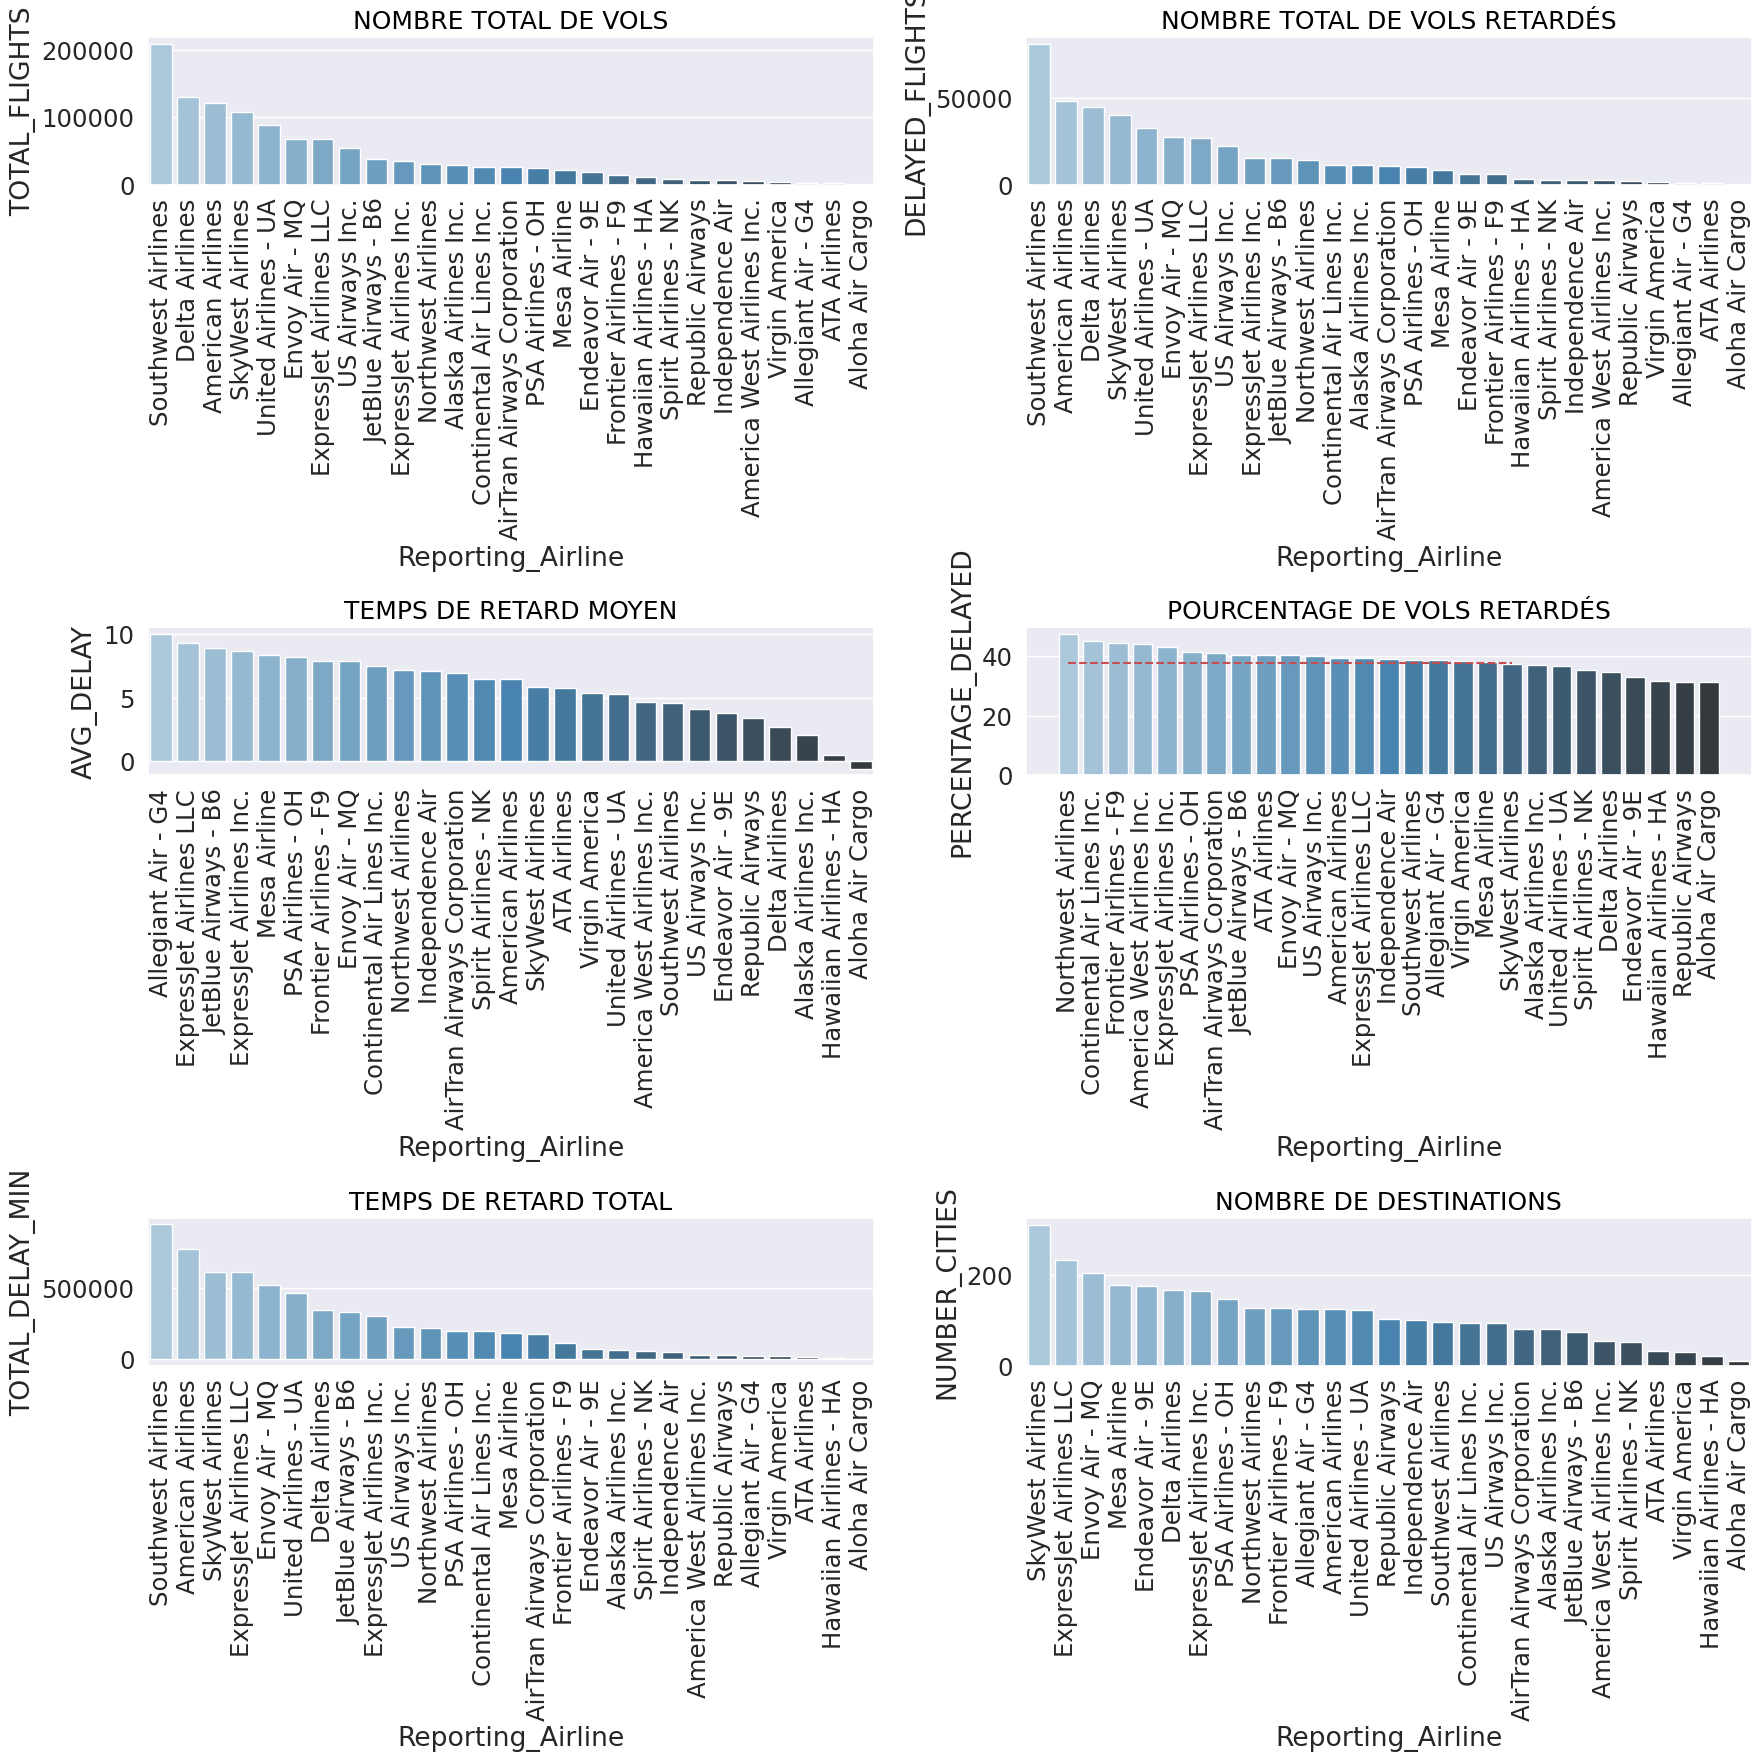

In [78]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('NOMBRE TOTAL DE VOLS', fontsize=18, color="black")
sub1 = sns.barplot(x="Reporting_Airline", y="TOTAL_FLIGHTS", data=df2, palette="Blues_d", ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('NOMBRE TOTAL DE VOLS RETARDÉS', fontsize=18, color="black")
sub2 = sns.barplot(x="Reporting_Airline", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).Reporting_Airline, palette="Blues_d", ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('TEMPS DE RETARD MOYEN', fontsize=18, color="black")
sub3 = sns.barplot(x="Reporting_Airline", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).Reporting_Airline, palette="Blues_d", ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('POURCENTAGE DE VOLS RETARDÉS', fontsize=18, color="black")
sub4 = sns.barplot(x="Reporting_Airline", y="PERCENTAGE_DELAYED", data=df2, order=df2.sort_values('PERCENTAGE_DELAYED', ascending=False).Reporting_Airline, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=37.52, xmin=0, xmax=18, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('TEMPS DE RETARD TOTAL', fontsize=18, color="black")
sub5 = sns.barplot(x="Reporting_Airline", y="TOTAL_DELAY_MIN", data=df2, order=df2.sort_values('TOTAL_DELAY_MIN', ascending=False).Reporting_Airline, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)

sub6 = fig.add_subplot(326)
sub6.set_title('NOMBRE DE DESTINATIONS', fontsize=18, color="black")
sub6 = sns.barplot(x="Reporting_Airline", y="NUMBER_CITIES", data=df2, order=df2.sort_values('NUMBER_CITIES', ascending=False).Reporting_Airline, palette="Blues_d", ax=sub6)
sub6.set_xticklabels(sub6.get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()